# Final Project - Ironhack Data Analytics Bootcamp
# Spotify Prediction Model - Exploration and Transformation

The below code uses a dataset obtained from the Spotify API that includes registers for over 100k songs and their audio features along with a popularity value. The model built for this project aims to predict how popular a song will be based on its audio features. 

#### Importing the packages to be used

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import preprocessing

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Importing the dataset

In [3]:
spotify=pd.read_csv('./data/SpotifyAudioFeaturesNov2018.csv')

## Data Exploration

A general overview of the data is necessary for a proper understanding

In [4]:
spotify.head()

artist_name                track_id  \
0          YG  2RM4jf1Xa9zPgMGRDiht8O   
1          YG  1tHDG53xJNGsItRA3vfVgs   
2       R3HAB  6Wosx2euFPMT14UXiWudMy   
3  Chris Cooq  3J2Jpw61sO7l6Hc7qdYV91   
4  Chris Cooq  2jbYvQCyPgX3CdmAzeVeuS   

                                       track_name  acousticness  danceability  \
0  Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj      0.005820         0.743   
1                    BAND DRUM (feat. A$AP Rocky)      0.024400         0.846   
2                                   Radio Silence      0.025000         0.603   
3                                         Lactose      0.029400         0.800   
4                             Same - Original mix      0.000035         0.783   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0       238373   0.339             0.000    1    0.0812    -7.678     1   
1       214800   0.557             0.000    8    0.2860    -7.259     1   
2       138913   0.723             0.000    9    0.0824    -5.890     0   
3       125381   0.579             0.912    5    0.0994   -12.118     0   
4       124016   0.792             0.878    7    0.0332   -10.277     1   

   speechiness    tempo  time_signature  valence  popularity  
0       0.4090  203.927               4    0.118          44  
1       0.4570  159.009               4    0.371          10  
2       0.0454  114.966               4    0.382          63  
3       0.0701  123.003               4    0.641           9  
4       0.0661  120.047               4    0.928           8

The below is a description of the fields:

FIELD|DESCRIPTION|
:---|:---|
**artist_name**|Author of the track
**track_id**|The Spotify ID for the track
**track_name**|Official name of the track
**acousticness**|A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
**danceability**|Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 
**duration_ms**|The duration of the track in milliseconds.
**energy** |Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
**instrumentalness**|Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 
**key**|The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
**liveness**|Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
**loudness**|The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
**mode**|Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
**speechiness**|Detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 
**tempo**|The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
**time_signature**|An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
**valence**|A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).




#### Checking the feature data types in order to see if any conversion is needed

In [5]:
spotify.dtypes

artist_name          object
track_id             object
track_name           object
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
popularity            int64
dtype: object

We can see that just the columns "artist_name", "track_id", "track_name" are non-numerical columns, we might need to take an action on them in later stages. The rest of columns are numeric and are, in majority, normalized columns with a range between 0 to 1.

In [6]:
spotify.isna().sum()

artist_name         0
track_id            0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64

In [7]:
spotify.describe()

acousticness   danceability   duration_ms         energy  \
count  116372.000000  116372.000000  1.163720e+05  116372.000000   
mean        0.335472       0.582476  2.125462e+05       0.571829   
std         0.343066       0.189869  1.243208e+05       0.258560   
min         0.000000       0.000000  3.203000e+03       0.000000   
25%         0.029500       0.461000  1.640490e+05       0.401000   
50%         0.194000       0.606000  2.017730e+05       0.605000   
75%         0.620000       0.728000  2.402685e+05       0.776000   
max         0.996000       0.996000  5.610020e+06       1.000000   

       instrumentalness            key       liveness       loudness  \
count     116372.000000  116372.000000  116372.000000  116372.000000   
mean           0.230127       5.239894       0.194196      -9.944835   
std            0.363406       3.603924       0.167389       6.503818   
min            0.000000       0.000000       0.000000     -60.000000   
25%            0.000000       2.000000       0.097400     -11.845250   
50%            0.000187       5.000000       0.123000      -7.992000   
75%            0.491000       8.000000       0.234000      -5.701000   
max            1.000000      11.000000       0.999000       1.806000   

                mode    speechiness          tempo  time_signature  \
count  116372.000000  116372.000000  116372.000000   116372.000000   
mean        0.607534       0.112204     119.603767        3.883005   
std         0.488302       0.124382      30.151621        0.508566   
min         0.000000       0.000000       0.000000        0.000000   
25%         0.000000       0.038900      96.131000        4.000000   
50%         1.000000       0.056000     120.031500        4.000000   
75%         1.000000       0.129000     139.783000        4.000000   
max         1.000000       0.966000     249.983000        5.000000   

             valence     popularity  
count  116372.000000  116372.000000  
mean        0.438393      24.235082  
std         0.259566      17.931939  
min         0.000000       0.000000  
25%         0.222000      10.000000  
50%         0.419000      22.000000  
75%         0.637000      35.000000  
max         1.000000     100.000000

Based on the data above, we expect to have some outliers in the data. In order to make sure this guess is right, we use boxplots to visually identify the outliers. For our project, we will identify as outliers all registers beyond the three standard deviations threshold or the 0.997 quantile.

In [8]:
def findNumericColumns(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    return df.select_dtypes(include=numerics).columns.tolist()

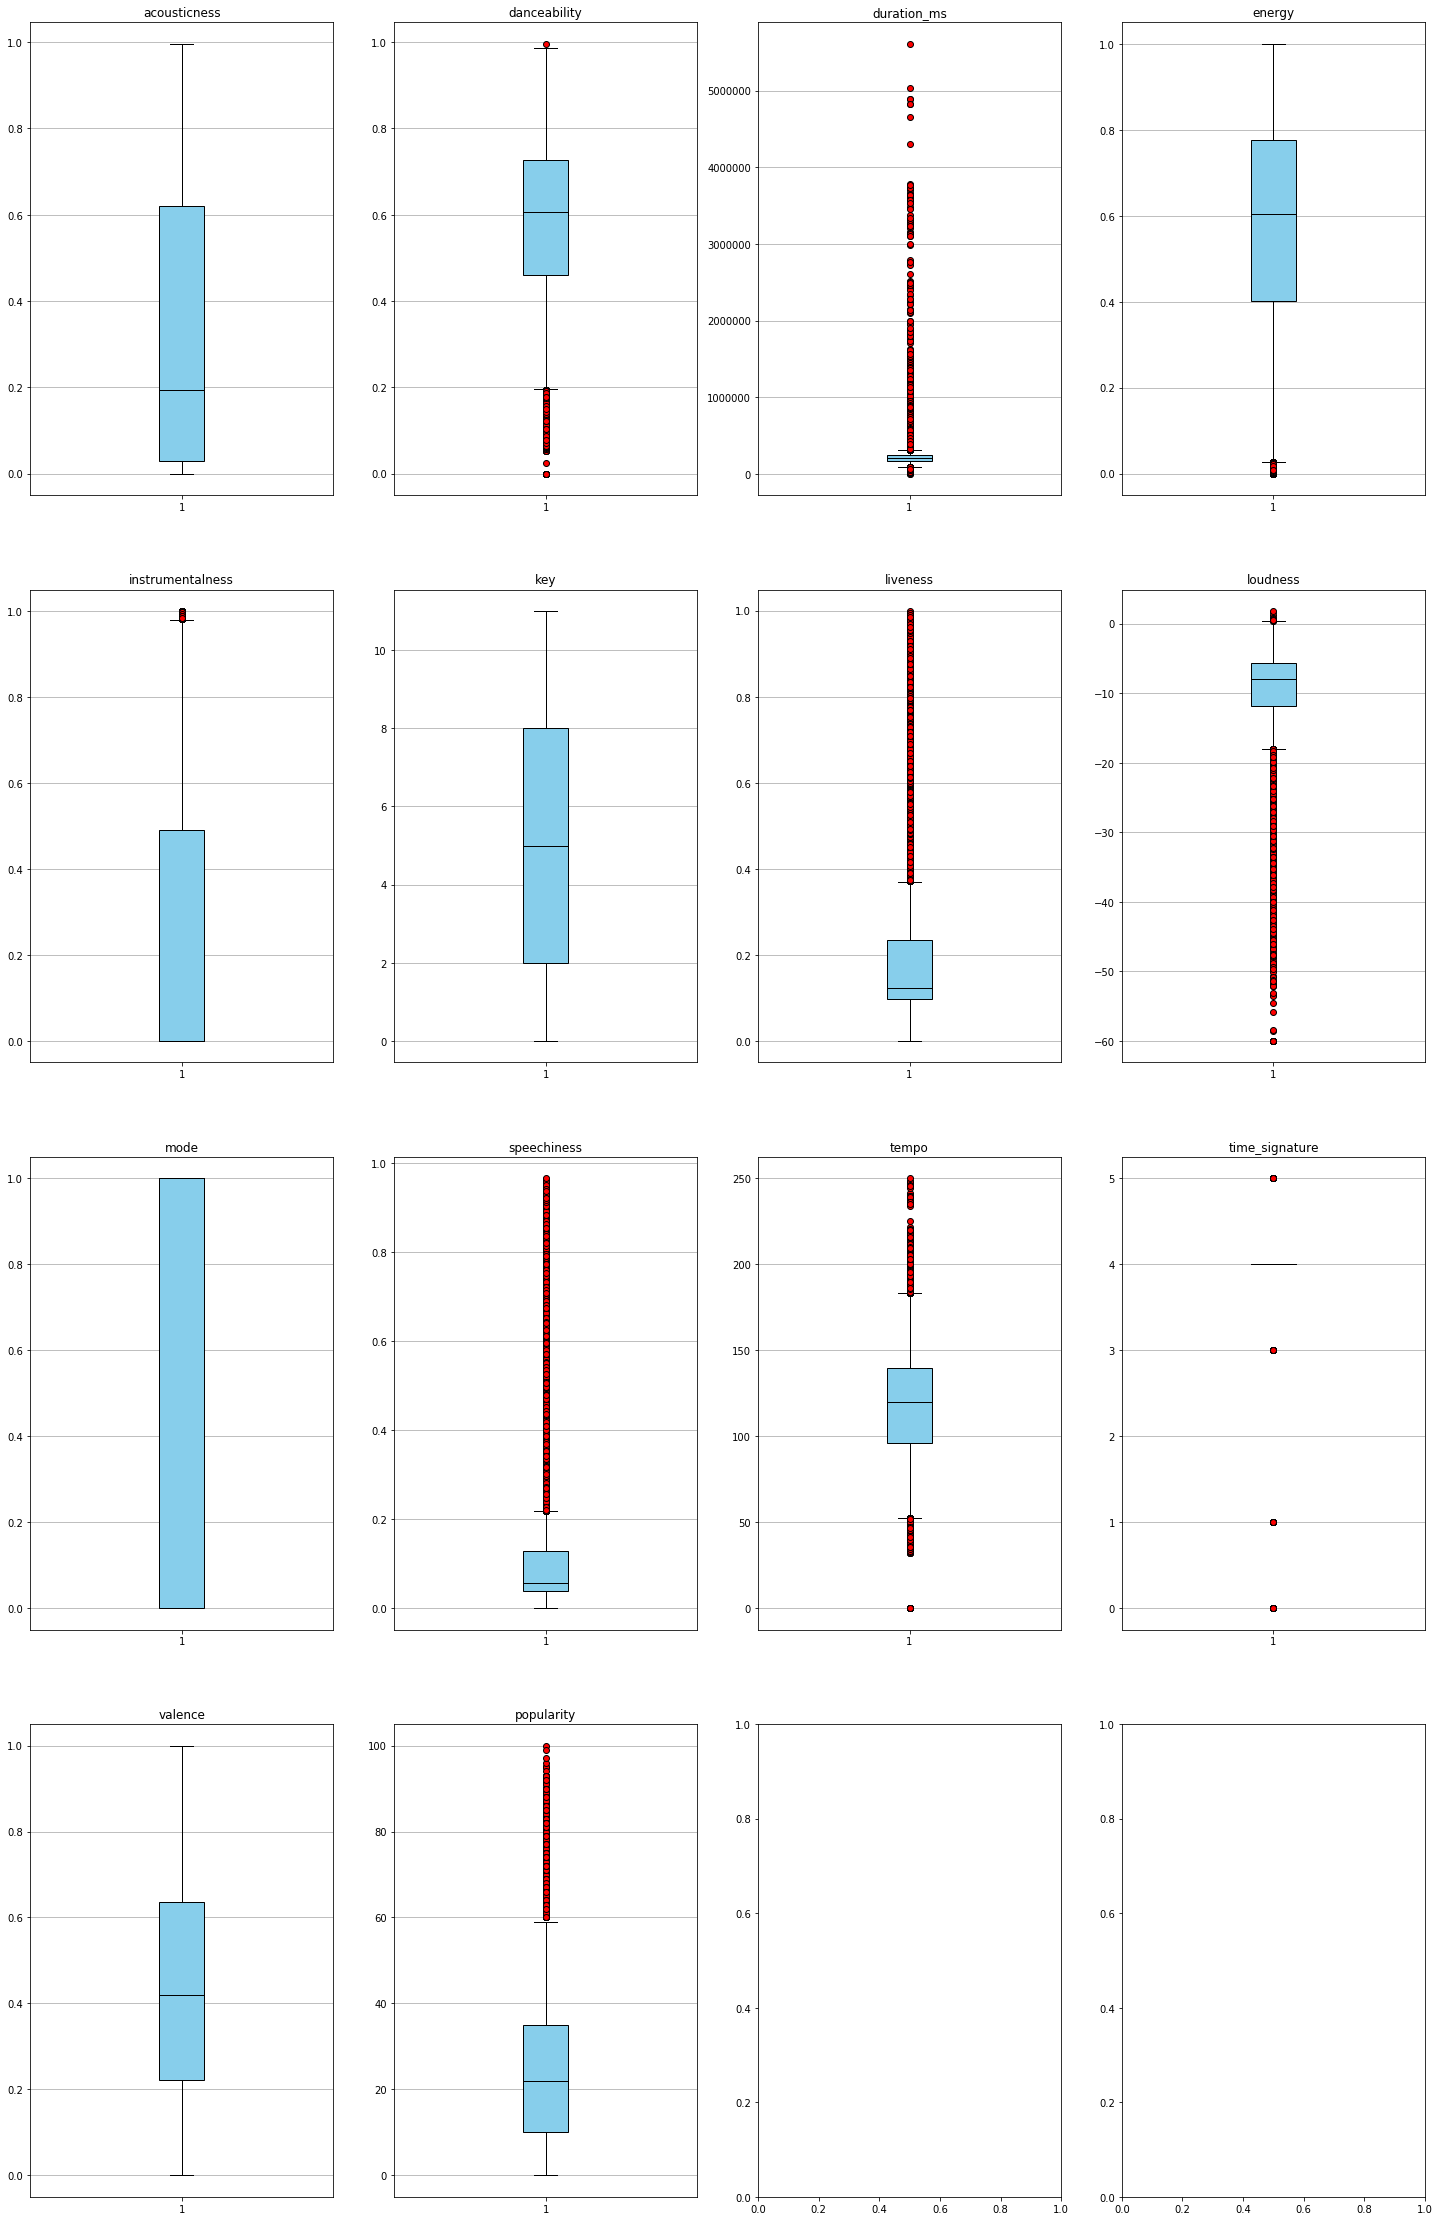

In [9]:
numCols=findNumericColumns(spotify)
f, ax=plt.subplots(math.ceil(len(numCols)/4), 4 ,figsize=(25,40))
for i,e in enumerate(numCols):
    red_outliers = dict(markerfacecolor='r', marker='o')
    ax[int(i/4)][i%4].boxplot(spotify[e],whis=0.997,flierprops=red_outliers, patch_artist=True, medianprops=dict(color='black'), boxprops=dict(facecolor='skyblue', color='black'))
    ax[int(i/4)][i%4].set_title(e)
    ax[int(i/4)][i%4].yaxis.grid(True)

We also want to have a look at the frecuencies by using histograms

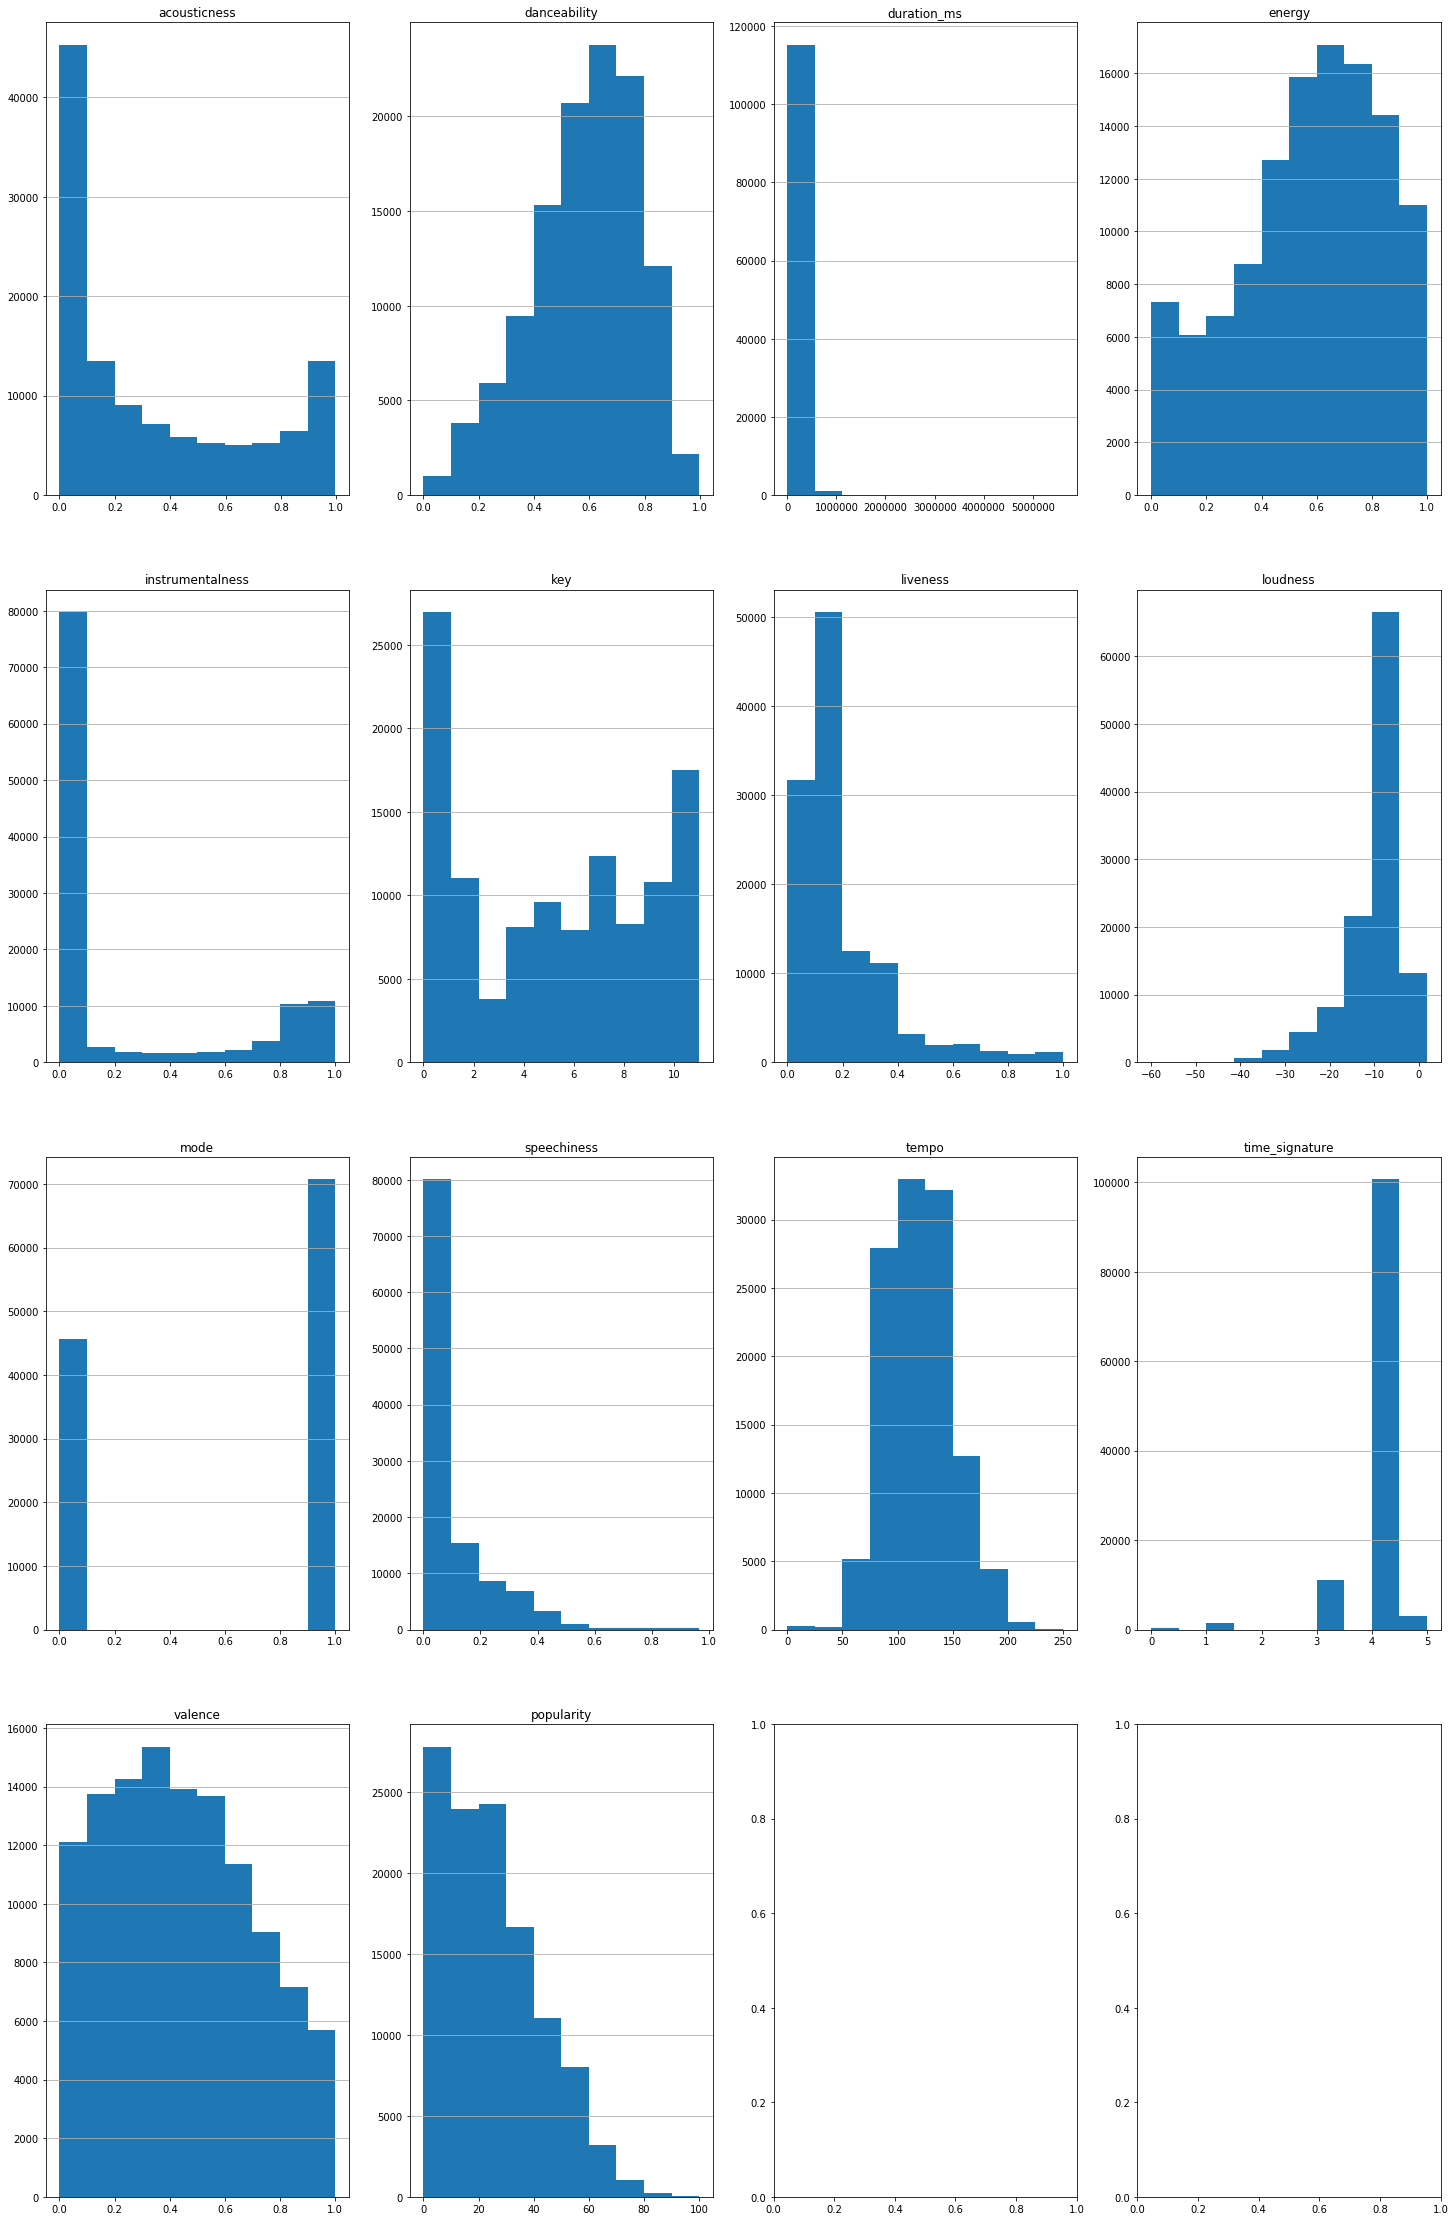

In [10]:
numCols=findNumericColumns(spotify)
f, ax=plt.subplots(math.ceil(len(numCols)/4), 4 ,figsize=(25,40))
for i,e in enumerate(numCols):
    red_outliers = dict(markerfacecolor='r', marker='o')
    ax[int(i/4)][i%4].hist(spotify[e])
    ax[int(i/4)][i%4].set_title(e)
    ax[int(i/4)][i%4].yaxis.grid(True)

We now want to see if linear correlations exists in our model:

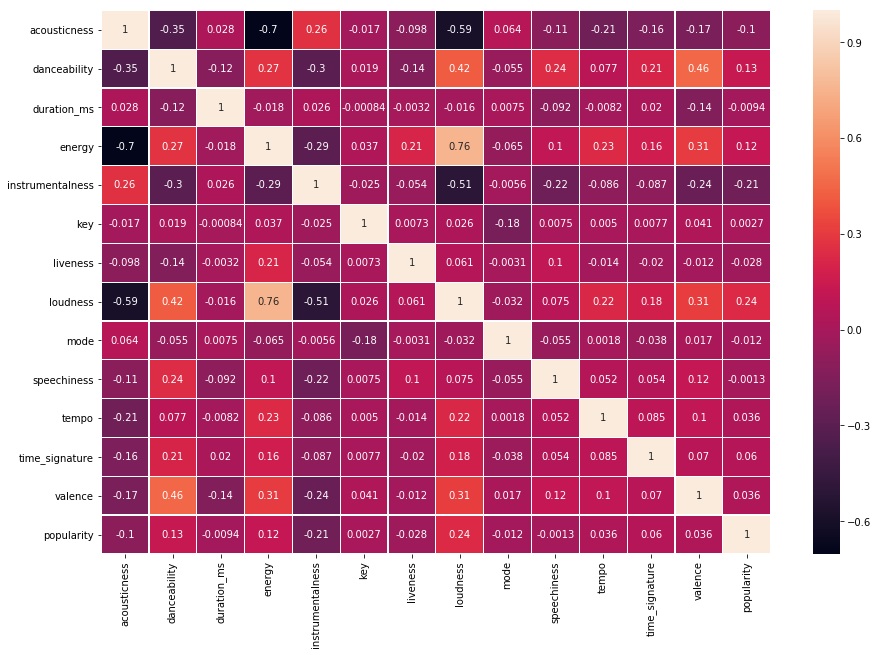

In [11]:
spotifyCorr=spotify.corr()
f, ax=plt.subplots(figsize=(15,10))
sns.heatmap(spotifyCorr, annot=True, linecolor='white', linewidths=0.2)

As we see in the correlation heatmap above, there is no really high correlations between our numeric variables. The highest correlation is loudness-energy which presents a 0.76 ratio.Below we can see a density scatter plot and the corresponding histograms.

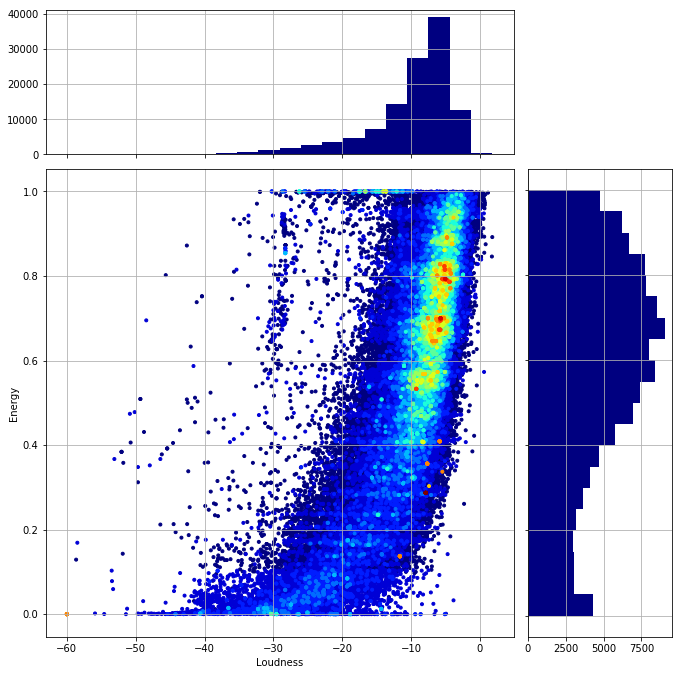

In [12]:
from matplotlib.ticker import NullFormatter

# Input for the 2dhistogram
x, y = [spotify['loudness'],spotify['energy']]

# histogram the data
bins = [1000, 1000] # number of bins
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

#Position and dimension the three plots
rect_scatter = [0.1, 0.1, 0.65, 0.65]
rect_histx = [0.1, 0.77, 0.65, 0.2]
rect_histy = [0.77, 0.1, 0.2, 0.65]

plt.figure(1,figsize=(10,10)).clf()
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
axScatter.scatter(x2, y2, c=z2, cmap='jet', marker='.')
axHistx.hist(x, color='navy', bins=20)
axHisty.hist(y, orientation='horizontal', color='navy', bins=20)
axScatter.set_xlabel('Loudness')
axScatter.set_ylabel('Energy')
axHistx.grid(True)
axHisty.grid(True)
axScatter.grid(True)
axHistx.xaxis.set_major_formatter(NullFormatter())
axHisty.yaxis.set_major_formatter(NullFormatter())

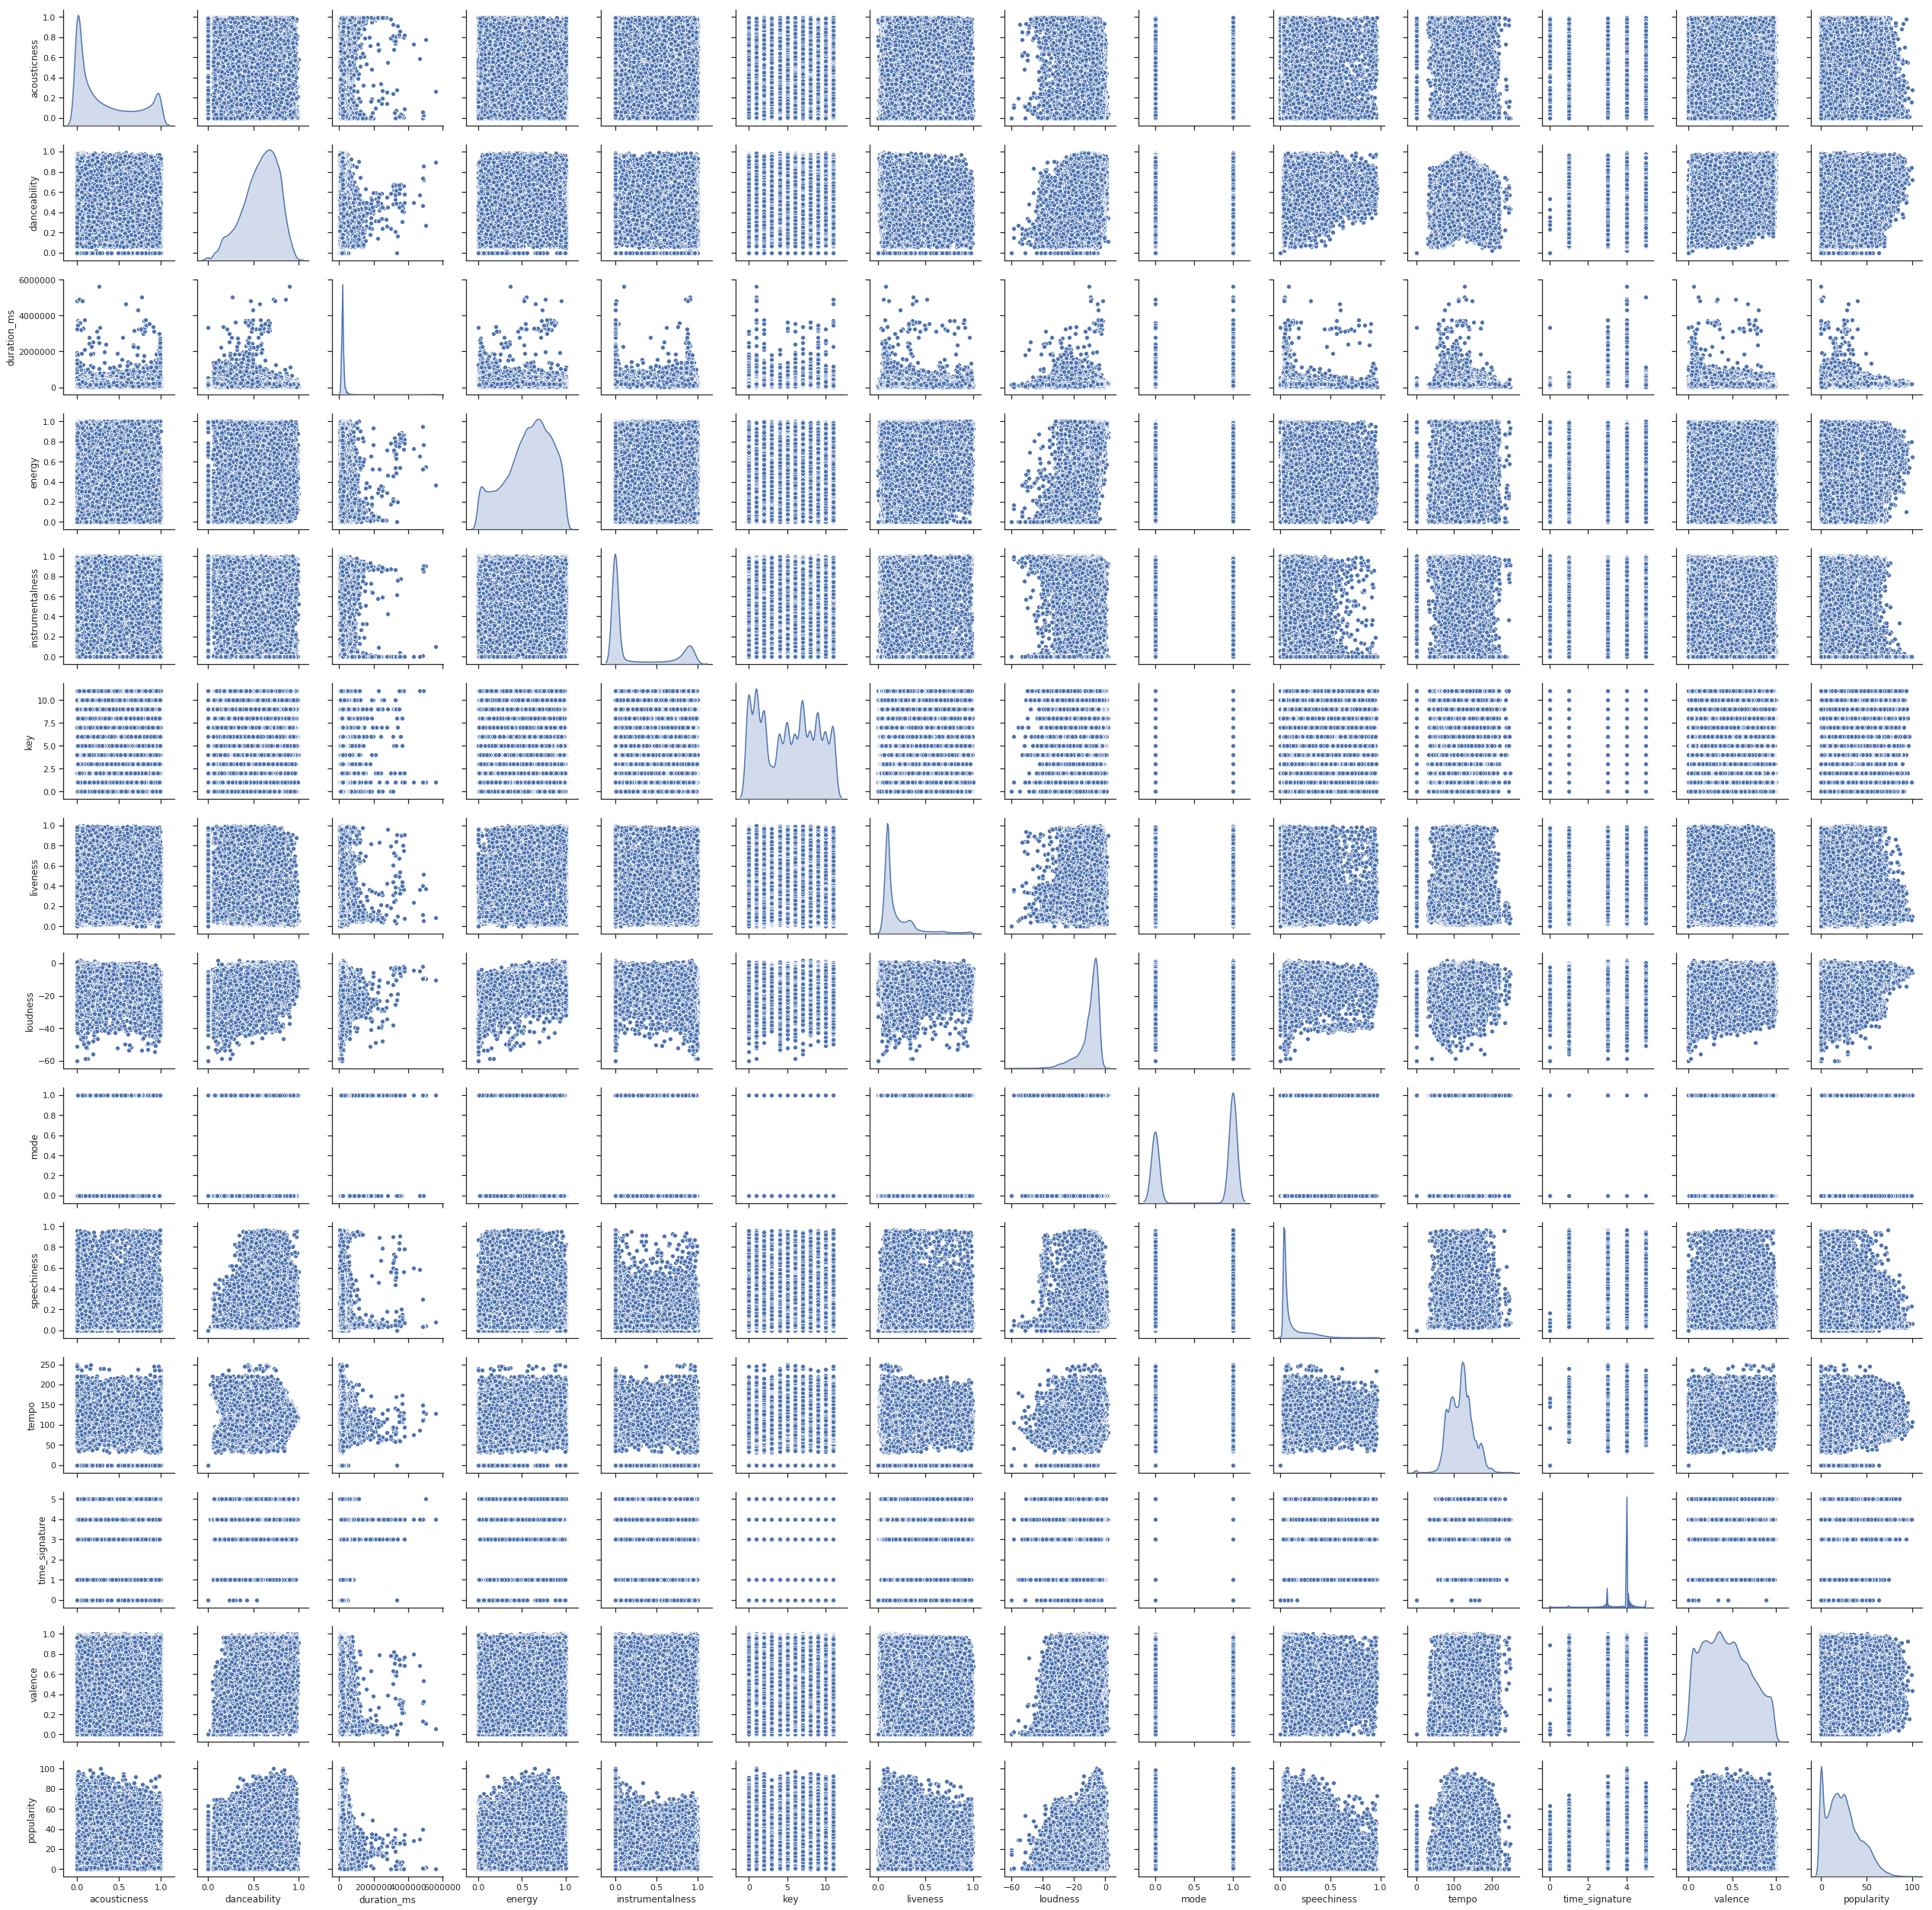

In [13]:
sns.set(style="ticks")
sns.pairplot(spotify, diag_kind='kde')

## Data Manipulation - Data Wrangling

First thing we need to do is decide what we are going to do with the non-numeric columns in our data set, let's have a closer look to each one of them.

In [14]:
spotify.columns

Index(['artist_name', 'track_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'popularity'],
      dtype='object')

In [15]:
display(len(spotify['artist_name'].value_counts()))
valc=spotify['artist_name'].value_counts()
display(valc)

32105

Johann Sebastian Bach       2841
Wolfgang Amadeus Mozart      929
Armin van Buuren             773
Ludwig van Beethoven         654
Frédéric Chopin              521
Image Sounds                 369
Claude Debussy               330
Waka Flocka Flame            269
Antonio Vivaldi              241
Duo Libano                   240
Binaural Beats Sleep         236
Los Cadetes De Linares       231
Rain Sounds                  188
Above & Beyond               185
Shun Yu                      179
Ron Komie                    175
Franz Schubert               139
George Frideric Handel       127
Pyotr Ilyich Tchaikovsky     124
DJ Fuqua                     118
Eagles                       115
Tiger Lily                   108
Yuuki Sung                   106
Jonathan Hay                 102
Thunderstorm Sound Bank      101
Mike Smith                   100
Chief Keef                    98
Samson Oxmoor                 96
J3 EDC                        86
R.E.M.                        86
          

We can see that the field 'artist_name' holds a large number of unique values hence we can directly apply a one-hot-encoding process; however, we realize the artist column could have an important influence in the popularity of a song, this means we ought to preserve the column. In order to resolve this issue, we have decided that artists with less than 50 songs in the dataset will be grouped under 'Others' since that number does not represent a significant quantity for our model to properly learn. After doing so, we will apply one-hot-encoding to the column.

In [16]:
valOver50=[valc.index[i] for i,e in enumerate(valc) if e>=100]

In [17]:
def classifyToOthers(listToPreserve, df, column):
    res=[]
    for e in df[column]:    
        if e in listToPreserve:
            res.append(e)
        else:
            res.append('Others')
    return res

In [18]:
spotify['artist_name']=classifyToOthers(valOver50,spotify,'artist_name')

In [19]:
spotify['artist_name'].value_counts()

Others                      106871
Johann Sebastian Bach         2841
Wolfgang Amadeus Mozart        929
Armin van Buuren               773
Ludwig van Beethoven           654
Frédéric Chopin                521
Image Sounds                   369
Claude Debussy                 330
Waka Flocka Flame              269
Antonio Vivaldi                241
Duo Libano                     240
Binaural Beats Sleep           236
Los Cadetes De Linares         231
Rain Sounds                    188
Above & Beyond                 185
Shun Yu                        179
Ron Komie                      175
Franz Schubert                 139
George Frideric Handel         127
Pyotr Ilyich Tchaikovsky       124
DJ Fuqua                       118
Eagles                         115
Tiger Lily                     108
Yuuki Sung                     106
Jonathan Hay                   102
Thunderstorm Sound Bank        101
Mike Smith                     100
Name: artist_name, dtype: int64

The second numeric column 'track_id' defines a unique code for each song in order to be identified, this does not add any extra value to our model so we have decided to remove it.

In [20]:
spotifyFilt=spotify.drop(columns=['track_id'])
spotifyFilt.head()

artist_name                                      track_name  acousticness  \
0      Others  Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj      0.005820   
1      Others                    BAND DRUM (feat. A$AP Rocky)      0.024400   
2      Others                                   Radio Silence      0.025000   
3      Others                                         Lactose      0.029400   
4      Others                             Same - Original mix      0.000035   

   danceability  duration_ms  energy  instrumentalness  key  liveness  \
0         0.743       238373   0.339             0.000    1    0.0812   
1         0.846       214800   0.557             0.000    8    0.2860   
2         0.603       138913   0.723             0.000    9    0.0824   
3         0.800       125381   0.579             0.912    5    0.0994   
4         0.783       124016   0.792             0.878    7    0.0332   

   loudness  mode  speechiness    tempo  time_signature  valence  popularity  
0    -7.678     1       0.4090  203.927               4    0.118          44  
1    -7.259     1       0.4570  159.009               4    0.371          10  
2    -5.890     0       0.0454  114.966               4    0.382          63  
3   -12.118     0       0.0701  123.003               4    0.641           9  
4   -10.277     1       0.0661  120.047               4    0.928           8

The only remaining numeric column is 'track_name', we can guess some relationships between the name and the popularity, however such relations are difficult to describe and are potentially not strong. Therefore, we have decided to drop this column.

In [21]:
spotifyFilt=spotifyFilt.drop(columns=['track_name'])
spotifyFilt.head()

artist_name  acousticness  danceability  duration_ms  energy  \
0      Others      0.005820         0.743       238373   0.339   
1      Others      0.024400         0.846       214800   0.557   
2      Others      0.025000         0.603       138913   0.723   
3      Others      0.029400         0.800       125381   0.579   
4      Others      0.000035         0.783       124016   0.792   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.000    1    0.0812    -7.678     1       0.4090  203.927   
1             0.000    8    0.2860    -7.259     1       0.4570  159.009   
2             0.000    9    0.0824    -5.890     0       0.0454  114.966   
3             0.912    5    0.0994   -12.118     0       0.0701  123.003   
4             0.878    7    0.0332   -10.277     1       0.0661  120.047   

   time_signature  valence  popularity  
0               4    0.118          44  
1               4    0.371          10  
2               4    0.382          63  
3               4    0.641           9  
4               4    0.928           8

In [22]:
spotifyFilt.head()

artist_name  acousticness  danceability  duration_ms  energy  \
0      Others      0.005820         0.743       238373   0.339   
1      Others      0.024400         0.846       214800   0.557   
2      Others      0.025000         0.603       138913   0.723   
3      Others      0.029400         0.800       125381   0.579   
4      Others      0.000035         0.783       124016   0.792   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.000    1    0.0812    -7.678     1       0.4090  203.927   
1             0.000    8    0.2860    -7.259     1       0.4570  159.009   
2             0.000    9    0.0824    -5.890     0       0.0454  114.966   
3             0.912    5    0.0994   -12.118     0       0.0701  123.003   
4             0.878    7    0.0332   -10.277     1       0.0661  120.047   

   time_signature  valence  popularity  
0               4    0.118          44  
1               4    0.371          10  
2               4    0.382          63  
3               4    0.641           9  
4               4    0.928           8

We need to transform the artist name column to numerical, for such purpose we will use the get dummies function that will convert each unique value in the column to a different column encoded as 0 and 1

In [23]:
spotifyFilt=pd.get_dummies(spotifyFilt)
spotifyFilt.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0      0.005820         0.743       238373   0.339             0.000    1   
1      0.024400         0.846       214800   0.557             0.000    8   
2      0.025000         0.603       138913   0.723             0.000    9   
3      0.029400         0.800       125381   0.579             0.912    5   
4      0.000035         0.783       124016   0.792             0.878    7   

   liveness  loudness  mode  speechiness           ...            \
0    0.0812    -7.678     1       0.4090           ...             
1    0.2860    -7.259     1       0.4570           ...             
2    0.0824    -5.890     0       0.0454           ...             
3    0.0994   -12.118     0       0.0701           ...             
4    0.0332   -10.277     1       0.0661           ...             

   artist_name_Others  artist_name_Pyotr Ilyich Tchaikovsky  \
0                   1                                     0   
1                   1                                     0   
2                   1                                     0   
3                   1                                     0   
4                   1                                     0   

   artist_name_Rain Sounds  artist_name_Ron Komie  artist_name_Shun Yu  \
0                        0                      0                    0   
1                        0                      0                    0   
2                        0                      0                    0   
3                        0                      0                    0   
4                        0                      0                    0   

   artist_name_Thunderstorm Sound Bank  artist_name_Tiger Lily  \
0                                    0                       0   
1                                    0                       0   
2                                    0                       0   
3                                    0                       0   
4                                    0                       0   

   artist_name_Waka Flocka Flame  artist_name_Wolfgang Amadeus Mozart  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   artist_name_Yuuki Sung  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 41 columns]

In [24]:
spotifyFilt.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0      0.005820         0.743       238373   0.339             0.000    1   
1      0.024400         0.846       214800   0.557             0.000    8   
2      0.025000         0.603       138913   0.723             0.000    9   
3      0.029400         0.800       125381   0.579             0.912    5   
4      0.000035         0.783       124016   0.792             0.878    7   

   liveness  loudness  mode  speechiness           ...            \
0    0.0812    -7.678     1       0.4090           ...             
1    0.2860    -7.259     1       0.4570           ...             
2    0.0824    -5.890     0       0.0454           ...             
3    0.0994   -12.118     0       0.0701           ...             
4    0.0332   -10.277     1       0.0661           ...             

   artist_name_Others  artist_name_Pyotr Ilyich Tchaikovsky  \
0                   1                                     0   
1                   1                                     0   
2                   1                                     0   
3                   1                                     0   
4                   1                                     0   

   artist_name_Rain Sounds  artist_name_Ron Komie  artist_name_Shun Yu  \
0                        0                      0                    0   
1                        0                      0                    0   
2                        0                      0                    0   
3                        0                      0                    0   
4                        0                      0                    0   

   artist_name_Thunderstorm Sound Bank  artist_name_Tiger Lily  \
0                                    0                       0   
1                                    0                       0   
2                                    0                       0   
3                                    0                       0   
4                                    0                       0   

   artist_name_Waka Flocka Flame  artist_name_Wolfgang Amadeus Mozart  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   artist_name_Yuuki Sung  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 41 columns]

For classification purposes we will convert the popularity field in a categorical feature containing 3 different clases:

* 3: 0-15 (low popularity)
* 2: 16-30 (medium popularity)
* 1: 31-100 (high popularity)

Reducing the number of classes will make our models more accurate

In [25]:
Clas=spotifyFilt.copy()
labl=[3,2,1]
popularityClas=pd.cut(Clas['popularity'],[-1,15,30,100], labels=labl)
#Clas['popularityClas'].value_counts()

We also need to transform the data to normalize the fields that are not between 0 and 1

In [26]:
from sklearn import preprocessing
x1 = Clas.values #returns a numpy array
robustScaler = preprocessing.RobustScaler()
robustScaler.fit(x1)
x1_scaled=robustScaler.transform(x1)
cols=Clas.columns
Clas= pd.DataFrame(x1_scaled)
Clas.columns=cols
Clas.head()

acousticness  danceability  duration_ms    energy  instrumentalness  \
0     -0.318679      0.513109     0.480192 -0.709333         -0.000381   
1     -0.287214      0.898876     0.170914 -0.128000         -0.000381   
2     -0.286198     -0.011236    -0.824723  0.314667         -0.000381   
3     -0.278747      0.726592    -1.002263 -0.069333          1.857053   
4     -0.328476      0.662921    -1.020172  0.498667          1.787807   

        key  liveness  loudness  mode  speechiness           ...            \
0 -0.666667 -0.306003  0.051105   0.0     3.917869           ...             
1  0.500000  1.193265  0.119299   0.0     4.450610           ...             
2  0.666667 -0.297218  0.342108  -1.0    -0.117647           ...             
3  0.000000 -0.172767 -0.671522  -1.0     0.156493           ...             
4  0.333333 -0.657394 -0.371892   0.0     0.112098           ...             

   artist_name_Others  artist_name_Pyotr Ilyich Tchaikovsky  \
0                 0.0                                   0.0   
1                 0.0                                   0.0   
2                 0.0                                   0.0   
3                 0.0                                   0.0   
4                 0.0                                   0.0   

   artist_name_Rain Sounds  artist_name_Ron Komie  artist_name_Shun Yu  \
0                      0.0                    0.0                  0.0   
1                      0.0                    0.0                  0.0   
2                      0.0                    0.0                  0.0   
3                      0.0                    0.0                  0.0   
4                      0.0                    0.0                  0.0   

   artist_name_Thunderstorm Sound Bank  artist_name_Tiger Lily  \
0                                  0.0                     0.0   
1                                  0.0                     0.0   
2                                  0.0                     0.0   
3                                  0.0                     0.0   
4                                  0.0                     0.0   

   artist_name_Waka Flocka Flame  artist_name_Wolfgang Amadeus Mozart  \
0                            0.0                                  0.0   
1                            0.0                                  0.0   
2                            0.0                                  0.0   
3                            0.0                                  0.0   
4                            0.0                                  0.0   

   artist_name_Yuuki Sung  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  

[5 rows x 41 columns]

In [27]:
Clas['popularity']=popularityClas
Clas['popularity'].value_counts()

3    41638
1    38107
2    36627
Name: popularity, dtype: int64

In [28]:
Clas=Clas.drop(Clas[Clas['popularity']==2].index)

In [29]:
Clas.popularity.value_counts()

3    41638
1    38107
2        0
Name: popularity, dtype: int64

We now need to decide what to do with the outliers, as mentioned in the previous section, registers that are beyond the treshold of 3 standard deviation will be considered outliers. Let's see how many values we are speaking about.

In [30]:
def getOutliers(df, column, nStd):
    res=[]
    mx=(df[column].mean()+nStd*df[column].std())
    mn=(df[column].mean()-nStd*df[column].std())
    for i,r in enumerate(df[column]):
        if r>mx or r<mn:
            res.append(i)
    return res

In [31]:
FiltSpotifyClean=spotifyFilt.copy()
print('The number of registers with outliers:')    
display(len(FiltSpotifyClean))
listOut=[]
for e in numCols:
    if e!='popularity':    
        listOut.append(getOutliers(FiltSpotifyClean, e, 3))
listOut=[e for i in listOut for e in i]
FiltSpotifyClean.drop([e for e in listOut], inplace=True)
print('The number of registers without outliers:')    
display(len(FiltSpotifyClean))

The number of registers with outliers:


116372

The number of registers without outliers:


106687

We have identified the outliers and saved them in a different dataframe. In a latter stage we will train our model with and without the outliers to see which one returns better results. 

And same for the option without outliers:

In [32]:
ClasOut=FiltSpotifyClean.copy()
display(ClasOut.isna().sum().sum())
labl=[3,2,1]
popularityClasOut=pd.cut(ClasOut['popularity'],[-1,15,30,100], labels=labl)

0

In [33]:
from sklearn import preprocessing
x1 = ClasOut.values #returns a numpy array
robustScaler = preprocessing.RobustScaler()
robustScaler.fit(x1)
x1_scaled=robustScaler.transform(x1)
cols=ClasOut.columns
ClasOut= pd.DataFrame(x1_scaled)
ClasOut.columns=cols
ClasOut.head()

acousticness  danceability  duration_ms    energy  instrumentalness  \
0     -0.313746      0.490196     0.497046 -0.772472         -0.000368   
1     -0.279692      0.894118     0.172074 -0.160112         -0.000368   
2     -0.278592     -0.058824    -0.874088  0.306180         -0.000368   
3     -0.270528      0.713725    -1.060637 -0.098315          2.399632   
4     -0.324349      0.647059    -1.079454  0.500000          2.310158   

        key  liveness  loudness  mode  speechiness           ...            \
0 -0.666667 -0.341995  0.015018   0.0     4.133333           ...             
1  0.500000  1.374686  0.089046   0.0     4.694737           ...             
2  0.666667 -0.331936  0.330919  -1.0    -0.119298           ...             
3  0.000000 -0.189438 -0.769435  -1.0     0.169591           ...             
4  0.333333 -0.744342 -0.444170   0.0     0.122807           ...             

   artist_name_Others  artist_name_Pyotr Ilyich Tchaikovsky  \
0                 0.0                                   0.0   
1                 0.0                                   0.0   
2                 0.0                                   0.0   
3                 0.0                                   0.0   
4                 0.0                                   0.0   

   artist_name_Rain Sounds  artist_name_Ron Komie  artist_name_Shun Yu  \
0                      0.0                    0.0                  0.0   
1                      0.0                    0.0                  0.0   
2                      0.0                    0.0                  0.0   
3                      0.0                    0.0                  0.0   
4                      0.0                    0.0                  0.0   

   artist_name_Thunderstorm Sound Bank  artist_name_Tiger Lily  \
0                                  0.0                     0.0   
1                                  0.0                     0.0   
2                                  0.0                     0.0   
3                                  0.0                     0.0   
4                                  0.0                     0.0   

   artist_name_Waka Flocka Flame  artist_name_Wolfgang Amadeus Mozart  \
0                            0.0                                  0.0   
1                            0.0                                  0.0   
2                            0.0                                  0.0   
3                            0.0                                  0.0   
4                            0.0                                  0.0   

   artist_name_Yuuki Sung  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  

[5 rows x 41 columns]

In [34]:
# I am not sure why but ClasOut['popularity']=popularityClasOut generates null values,
# using a loop for that reason at efficiency cost
for i,e in enumerate(ClasOut['popularity']):
    ClasOut['popularity'][i]=popularityClasOut[i]
ClasOut['popularity'].isna().sum()

0

In [35]:
Clas=Clas.drop(Clas[Clas['popularity']==2].index)

Export to csv for future modelling

In [36]:
Clas.to_csv('Spotify_CleanWithOutliers')
ClasOut.to_csv('Spotify_CleanWithoutOutliers')

In [37]:
ClasOut.head()

acousticness  danceability  duration_ms    energy  instrumentalness  \
0     -0.313746      0.490196     0.497046 -0.772472         -0.000368   
1     -0.279692      0.894118     0.172074 -0.160112         -0.000368   
2     -0.278592     -0.058824    -0.874088  0.306180         -0.000368   
3     -0.270528      0.713725    -1.060637 -0.098315          2.399632   
4     -0.324349      0.647059    -1.079454  0.500000          2.310158   

        key  liveness  loudness  mode  speechiness           ...            \
0 -0.666667 -0.341995  0.015018   0.0     4.133333           ...             
1  0.500000  1.374686  0.089046   0.0     4.694737           ...             
2  0.666667 -0.331936  0.330919  -1.0    -0.119298           ...             
3  0.000000 -0.189438 -0.769435  -1.0     0.169591           ...             
4  0.333333 -0.744342 -0.444170   0.0     0.122807           ...             

   artist_name_Others  artist_name_Pyotr Ilyich Tchaikovsky  \
0                 0.0                                   0.0   
1                 0.0                                   0.0   
2                 0.0                                   0.0   
3                 0.0                                   0.0   
4                 0.0                                   0.0   

   artist_name_Rain Sounds  artist_name_Ron Komie  artist_name_Shun Yu  \
0                      0.0                    0.0                  0.0   
1                      0.0                    0.0                  0.0   
2                      0.0                    0.0                  0.0   
3                      0.0                    0.0                  0.0   
4                      0.0                    0.0                  0.0   

   artist_name_Thunderstorm Sound Bank  artist_name_Tiger Lily  \
0                                  0.0                     0.0   
1                                  0.0                     0.0   
2                                  0.0                     0.0   
3                                  0.0                     0.0   
4                                  0.0                     0.0   

   artist_name_Waka Flocka Flame  artist_name_Wolfgang Amadeus Mozart  \
0                            0.0                                  0.0   
1                            0.0                                  0.0   
2                            0.0                                  0.0   
3                            0.0                                  0.0   
4                            0.0                                  0.0   

   artist_name_Yuuki Sung  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  

[5 rows x 41 columns]